---
<i><b>Knowlege Sharing Content By: [Bhanu Pratap Singh](https://www.linkedin.com/in/bpst/)</b></i>

# Linear Regression - Combined Cycle Power Plant Dataset
<i>The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the plant was set to work with full load</i>

---

**Problem Statement**<br>
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.

Features consist of hourly average ambient variables Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (PE) of the plant.

To check and download dataset, click [here](https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant)

## Reading and Understanding the Data

In [1]:
# Importing required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load Dataset
df = pd.read_excel('Folds5x2_pp.xlsx')
df.shape

(9568, 5)

In [4]:
# Let's see top 5 rows
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [5]:
# Let's check column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [8]:
# Let's check statistical details
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


## Visualising the Data
Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to `PE`.

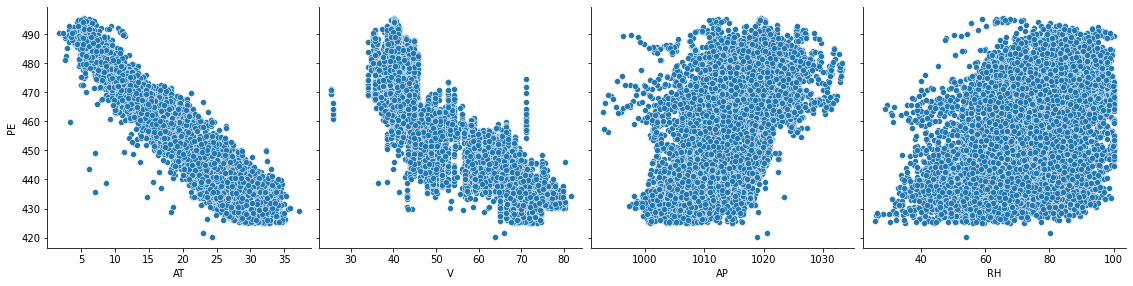

In [12]:
# Plotting all the features
sns.pairplot(df, x_vars=['AT', 'V', 'AP', 'RH'], y_vars='PE',size=4, aspect=1, kind='scatter')
plt.show()

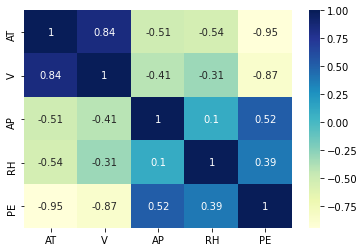

In [13]:
# Let's check the correlation matrics
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

As is visible from the pairplot and the heatmap, the variable `AT` seems to be most correlated with `PE`. So let's go ahead and perform simple linear regression using `AT` as our feature variable.

In [14]:
# Let's put feature in X
X = df['AT']

# Let's put target in y
y = df['PE']

### Test Train Set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [16]:
# Let's check shape of test train sets
print(X_train.shape)
print(X_test.shape)

(6697,)
(2871,)


## Build Linear Model

In [18]:
import statsmodels.api as sm

In [19]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [20]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    497.065821
AT        -2.170016
dtype: float64

In [21]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                 6.050e+04
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        07:49:41   Log-Likelihood:                -20766.
No. Observations:                6697   AIC:                         4.154e+04
Df Residuals:                    6695   BIC:                         4.155e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0658      0.186   2676.264      0.0

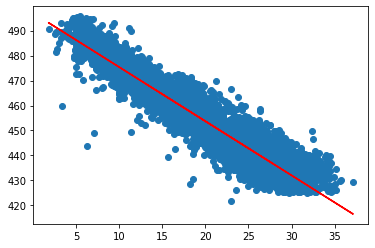

In [23]:
# Let's plot the best fit line
plt.scatter(X_train, y_train)
plt.plot(X_train, 497.1 + -2.17*X_train, 'r')
plt.show()

In [24]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

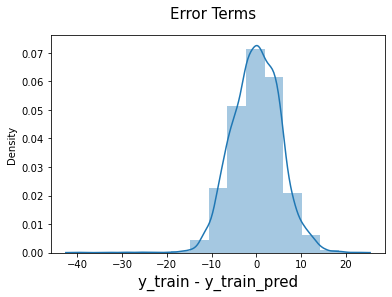

In [25]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

### Looking for patterns in the residuals

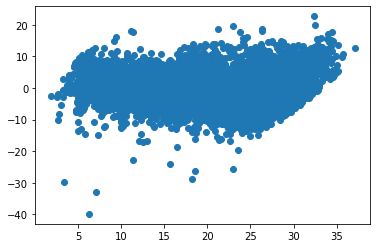

In [26]:
plt.scatter(X_train,res)
plt.show()

## Predictions on the Test Set

In [27]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Looking at the RMSE

In [29]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

5.540415067454483

### Checking the R-squared on the test set

In [30]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.895651687103582

### Visualizing the fit on the test set

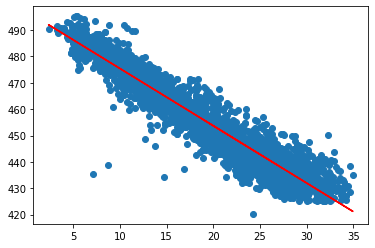

In [31]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 497.1 + -2.17 * X_test, 'r')
plt.show()